# Assignment 1
Simon Karumbi
s3455453

## Task 1: Data Preparation
Importing pandas, numpy and matplotlib.pyplot, as well as reading in the csv.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
nba = pd.read_csv('NBA_players_stats.csv')

In [3]:
# Observing the loaded data
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,0,0,NaN,84,145,0.579,44,81,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.00,1,6,0.167,0,0,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,0,1,0.00,115,186,0.618,35,79,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,2,6,0.05,234,413,0.567,160,189,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.36,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800


In [4]:
# Checking to see if the shape of the data matches our expectation
nba.shape

(512, 29)

### Categorical Variables

In [5]:
# Desribing the categorial data in the data frame
nba.select_dtypes(include='object').describe()

,Player,Pos,Tm
count,512,512,512
unique,492,20,55
top,James Harden,SG,BRK
freq,3,117,19


In [6]:
# There are some issues with the string values for the positions.
nba['Pos'].unique()

array(['PF', 'PG', 'C', 'SG', 'SG ', 'SF', 'SGa', 'SF.', 'PFa', 'PF ',
       'C ', ' PG', 'PG-SG ', 'sg', 'Sf', ' SG', 'SF-PF', 'pg', ' SF',
       'Pg'], dtype=object)

In [7]:
# Creating a function to format the strings for player positions
import re

def fix_positions(positions):
    result = []
    for value in positions:
        value = value.strip()
        value = value.upper()
        value = re.sub('[^PFCSG-]','', value)
        result.append(value)
    return result

In [8]:
# Making sure the function works and returns the expected result
pd.Series(fix_positions(nba['Pos'])).unique()

array(['PF', 'PG', 'C', 'SG', 'SF', 'PG-SG', 'SF-PF'], dtype=object)

In [9]:
# Applying the change
nba['Pos'] = fix_positions(nba['Pos'])

In [10]:
teams = ['MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK',
'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC',
'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU']

In [11]:
# Checking to see if there are any issues with the formatting of team names
for team in nba['Tm'].unique():
    if team not in teams:
        print(team)

SAS 
 PHO
 TOT
BRK 
OKC 
 NOP
 PHI
DET 
 BRK
 IND
MIL 
 SAS
ORL 
 ORL
CLE 
H0U
NyK
 MEM
MIA 
 WAS
IND 
 BOS
GSW 
MEM 


In [12]:
# Creating a function to fix the formatting issues noticed above
def fix_teams(teams):
    result = []
    for value in teams:
        value = value.strip()
        value = value.upper()
        result.append(value)
    return result;

In [13]:
# Applying the change
nba['Tm'] = pd.Series(fix_teams(nba['Tm']))

In [14]:
# Double checking all teams were 
for team in nba['Tm'].unique():
    if team not in teams:
        print(team)

H0U


In [15]:
# Manually changing the remaining team name as we can be fairly certain the intended name
nba.loc[nba['Tm'] == 'H0U', 'Tm'] = 'HOU'

In [16]:
# Checking for unique player names
nba[nba['Player'].map(nba['Player'].value_counts()) > 1]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8,9,Jarrett Allen,C,22,TOT,35,17,977,172,257,0.669,4,8,0.050,168,249,0.675,123,166,0.741,111,235,346,60,16,59,54,55,471
9,9,Jarrett Allen,C,22,BRK,12,5,320,44,65,0.677,0,0,NaN,44,65,0.677,46,61,0.754,38,87,125,20,7,19,22,21,134
10,9,Jarrett Allen,C,22,CLE,23,12,657,128,192,0.667,4,8,0.500,124,184,0.674,77,105,0.733,73,148,221,40,9,40,32,34,337
183,182,James Harden,PG-SG,31,TOT,31,31,1173,250,517,0.484,101,252,0.401,149,265,0.562,183,213,0.859,26,216,242,345,36,21,131,67,784
184,182,James Harden,SG,31,HOU,8,8,290,60,135,0.444,25,72,0.347,35,63,0.556,53,60,0.883,5,36,41,83,7,6,34,14,198
185,182,James Harden,PG,31,BRK,23,23,883,190,382,0.497,76,180,0.422,114,202,0.564,130,153,0.850,21,180,201,262,29,15,97,53,586
241,238,Damian Jones,C,25,TOT,17,1,125,13,21,0.619,0,1,0.000,13,20,0.650,8,13,0.615,9,14,23,4,1,9,6,25,34
242,238,Damian Jones,C,25,PHO,14,0,94,8,16,0.500,0,1,0.000,8,15,0.533,6,11,0.545,7,11,18,4,1,5,6,19,22
243,238,Damian Jones,C,25,LAL,3,1,31,5,5,1.000,0,0,NaN,5,5,1.000,2,2,1.000,2,3,5,0,0,4,0,6,12
260,255,Rodions Kurucs,SF-PF,22,TOT,16,0,91,6,24,0.250,3,17,0.176,3,7,0.429,1,2,0.500,2,12,14,6,6,4,9,8,16


In [17]:
multiteam_players = nba[nba['Player'].map(nba['Player'].value_counts()) > 1]['Player'].unique()

Checking for unique player names reveals that there are several players that have played across different teams. This is fine for the moment, however, could impact the analysis depending on whether you are looking at analysis on a player by player basis, or on a team by team basis. Saving a list of these players' ranks to use at a later time if necessary.

### Numerical Variables

In [18]:
# Describing the numerical data in the data frame
nba.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,509.000000,512.000000,512.000000,479.000000,512.000000,512.000000,505.000000,512.000000,512.000000,480.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,248.046875,26.025391,22.515625,10.603516,512.730469,87.326172,187.789062,0.439961,27.218750,73.910156,0.316823,60.107422,113.878906,0.501632,36.658203,47.070312,0.742929,20.808594,73.439453,94.248047,52.925781,16.050781,10.509766,28.810547,41.898438,333.275391
std,141.539473,12.099932,10.762502,12.697945,374.173372,82.210894,170.428063,0.120485,29.654749,75.700355,0.140463,63.802427,116.742818,0.143022,45.406517,56.053013,0.171721,24.399771,66.360902,86.459582,60.983960,13.501952,13.058198,28.076169,31.061290,1550.220911
min,1.000000,-19.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.750000,22.000000,14.000000,0.000000,147.750000,18.000000,43.000000,0.391000,3.000000,9.000000,0.285500,10.000000,22.000000,0.444000,6.000000,8.000000,0.667000,4.000000,18.750000,23.000000,9.000000,4.000000,2.000000,7.000000,14.000000,50.000000
50%,250.500000,25.000000,25.000000,3.000000,497.000000,64.500000,145.000000,0.442000,17.000000,50.500000,0.349000,39.000000,75.000000,0.510000,21.000000,29.000000,0.772000,13.000000,57.500000,73.000000,35.000000,14.000000,6.000000,22.000000,39.500000,180.000000
75%,370.250000,28.000000,33.000000,20.000000,814.250000,131.250000,275.000000,0.500000,45.000000,119.250000,0.394000,88.250000,171.000000,0.575000,48.000000,63.250000,0.851000,27.000000,110.000000,140.000000,69.000000,25.000000,14.000000,40.250000,64.000000,356.750000
max,492.000000,280.000000,38.000000,37.000000,1358.000000,379.000000,764.000000,1.000000,169.000000,411.000000,1.000000,329.000000,543.000000,1.000000,298.000000,363.000000,1.000000,159.000000,357.000000,472.000000,345.000000,63.000000,111.000000,149.000000,228.000000,28800.000000


In [19]:
# Checking that each rank is associated to a unique player
len(nba['Rk'].unique()) == len(nba['Player'].unique())

True

In [20]:
# Age less than 18 is not possible
nba[nba['Age'] < 18]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
197,194,Killian Hayes,PG,-19,DET,7,7,148,13,47,0.277,5,20,0.25,8,27,0.296,1,2,0.5,1,7,8,25,2,0,17,15,32


In [21]:
# Remove this row as we can't be certain of the data integrity
nba.drop(index = 197, inplace = True)

In [22]:
# Age more than 60
nba[nba['Age'] > 60]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
162,161,Anthony Gill,PF,280,WAS,12,1,67,3,10,0.3,1,7,0.143,2,3,0.667,3,4,0.75,3,16,19,4,3,2,3,3,10


In [23]:
# Drop the row as we can't be sure of the data integrity
nba.drop(index = 162, inplace = True)

In [24]:
# Minutes played less than 48 per game
nba[nba['GS'] / nba['MP'] > 48]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [25]:
# Points over 2000
nba[nba['PTS'] > 2000]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.00,1,6,0.167,0,0,NaN,0,3,3,2,0,0,0,1,20000
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.36,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800


In [26]:
# Points don't add up (can calculate this)
nba[3 * nba['3P'] + 2 * nba['2P'] + nba['FT'] != nba['PTS']]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.00,1,6,0.167,0,0,NaN,0,3,3,2,0,0,0,1,20000
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.36,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800


In [28]:
# 3 point percentage doesn't align
nba[round(nba['3P']/nba['3PA'], 3) != nba['3P%'].round(3)].shape

(38, 29)

In [29]:
# # Correcting the 3 point percentage
nba['3P%'] = round(nba['3P']/nba['3PA'], 3)

In [30]:
# 2 point percentage doesn't align
nba[round(nba['2P']/nba['2PA'], 3) != nba['2P%'].round(3)].shape

(8, 29)

In [31]:
# Correcting the 2 point percentage
nba['2P%'] = round(nba['2P']/nba['2PA'], 3)

In [32]:
# FT point percentage doesn't align
nba[round(nba['FT']/nba['FTA'], 3) != nba['FT%'].round(3)].shape

(33, 29)

In [33]:
# Correcting the FT percentage
nba['FT%'] = round(nba['FT']/nba['FTA'], 3)

In [34]:
# Performing the correct calculation fixes both issues
nba['PTS'] = 3 * nba['3P'] + 2 * nba['2P'] + nba['FT']

In [35]:
# NaN's from divided zeroes so can set to 0
nba[nba.loc[:,'FG%':'FT%'].isnull().any(axis=1)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,0,0,NaN,84,145,0.579,44,81,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.000,1,6,0.167,0,0,NaN,0,3,3,2,0,0,0,1,2
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,0.000,0,1,0.000,0,2,0.000,0,0,NaN,0,1,1,1,0,0,0,1,0
9,9,Jarrett Allen,C,22,BRK,12,5,320,44,65,0.677,0,0,NaN,44,65,0.677,46,61,0.754,38,87,125,20,7,19,22,21,134
14,13,Kostas Antetokounmpo,PF,23,LAL,3,0,19,1,3,0.333,0,0,NaN,1,3,0.333,1,2,0.500,2,6,8,0,1,2,5,3,3
23,22,Udoka Azubuike,C,21,UTA,12,0,49,4,7,0.571,0,0,NaN,4,7,0.571,4,6,0.667,4,9,13,0,1,4,3,8,12
40,39,Jordan Bell,C,26,WAS,3,1,50,5,15,0.333,0,2,0.000,5,13,0.385,0,0,NaN,5,11,16,5,1,3,3,4,10
45,44,Tyler Bey,SF,22,DAL,4,0,13,2,5,0.400,0,0,NaN,2,5,0.400,2,4,0.500,2,1,3,0,0,1,0,2,6
51,50,Keljin Blevins,SF,25,POR,9,0,47,2,11,0.182,0,4,0.000,2,7,0.286,0,0,NaN,0,2,2,4,2,0,3,4,4
55,54,Marques Bolden,C,22,CLE,6,0,29,1,3,0.333,0,0,NaN,1,3,0.333,5,8,0.625,3,3,6,0,2,2,2,0,7


In [36]:
nba = nba.fillna(0)

In [37]:
# exporting the cleaned data set to a new CSV file
nba.to_csv('cleaned_NBA_player_stats.csv')

## Task 2: Exploratory Data Analysis

### 2.1 Examing the Top 5 Players

In [38]:
import seaborn as sns
%matplotlib inline

In [39]:
# Top 5 scoring players
print(nba.groupby(['Player'])['PTS'].sum().sort_values(ascending = False).head(5))
top_5 = nba.groupby(['Player'])['PTS'].sum().sort_values(ascending = False).head(5).index.tolist()

Player
James Harden             1568
Bradley Beal             1053
Stephen Curry            1039
Giannis Antetokounmpo    1015
Damian Lillard           1013
Name: PTS, dtype: int64


In [40]:
nba_top_5 = nba[nba['Player'].isin(top_5)]

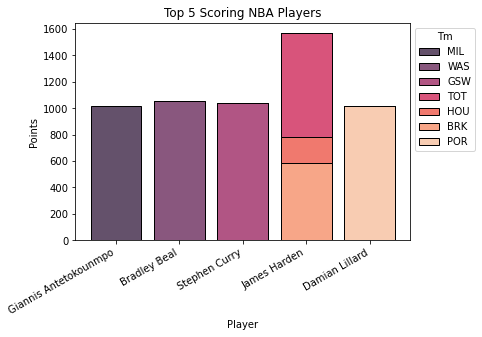

In [41]:
ax1 = sns.histplot(data=nba_top_5, x='Player', hue='Tm', weights='PTS',
             multiple='stack', palette='rocket', shrink=0.8)
ax1.set_title('Top 5 Scoring NBA Players')
ax1.set_ylabel('Points')
plt.xticks(rotation=30, ha='right')

# Fix the legend so it's not on top of the bars.
legend = ax1.get_legend()
legend.set_bbox_to_anchor((1, 1))

James Harden's statistics seem too high, this needs to be investigated further. 

In [42]:
nba_top_5[nba_top_5['Player'] == 'James Harden']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
183,182,James Harden,PG-SG,31,TOT,31,31,1173,250,517,0.484,101,252,0.401,149,265,0.562,183,213,0.859,26,216,242,345,36,21,131,67,784
184,182,James Harden,SG,31,HOU,8,8,290,60,135,0.444,25,72,0.347,35,63,0.556,53,60,0.883,5,36,41,83,7,6,34,14,198
185,182,James Harden,PG,31,BRK,23,23,883,190,382,0.497,76,180,0.422,114,202,0.564,130,153,0.850,21,180,201,262,29,15,97,53,586


After some research, it seems that the team name of 'TOT' refers to a players total number of points for the season based on the aggregation of statistics from each team. With this in mind, we only need to consider James Hardens' TOT entry.

In [43]:
print(nba.groupby(['Player', 'Tm'])['PTS'].sum().sort_values(ascending = False).head(5))
top_5 = nba.groupby(['Player', 'Tm'])['PTS'].sum().sort_values(ascending = False).head(5).index.tolist()
nba_top_5 = nba[nba[('Player')].isin([player[0] for player in top_5])]

Player                 Tm 
Bradley Beal           WAS    1053
Stephen Curry          GSW    1039
Giannis Antetokounmpo  MIL    1015
Damian Lillard         POR    1013
Nikola Jokić           DEN     977
Name: PTS, dtype: int64


In [44]:
nba_top_5 = nba_top_5.sort_values('PTS', ascending=False).reset_index(drop=True)

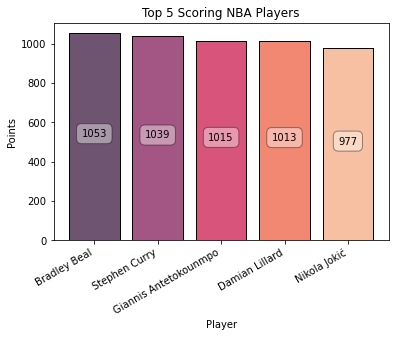

In [45]:
ax2 = sns.histplot(data=nba_top_5, x='Player', weights='PTS',
                   multiple='stack', palette='rocket', shrink=0.8, 
                   hue='Player')
ax2.set_title('Top 5 Scoring NBA Players')
ax2.set_ylabel('Points')
plt.xticks(rotation=30, ha='right')
ax2.get_legend().remove()

# Insert chart labels
groupedvalues = nba_top_5.groupby('Player').sum().reset_index()

for index, row in groupedvalues.iterrows():
    ax2.text(row.Player, row.PTS/2, round(row.PTS,2), color='black', ha='center', bbox=dict(facecolor='white', alpha=0.4, boxstyle="round,pad=0.5"))


Text(0, 0.5, '2 Pointers')

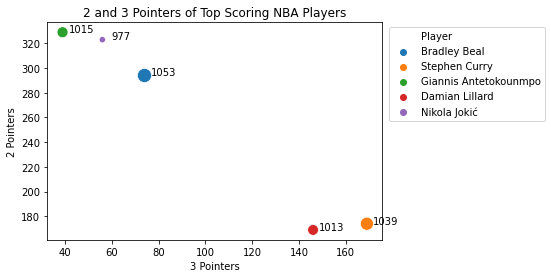

In [46]:
ax3 = sns.scatterplot(data=nba_top_5, x='3P', y='2P', size='PTS', hue='Player', sizes=(40,200))
ax3.set_title('2 and 3 Pointers of Top Scoring NBA Players')

# Setting legend
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels[:6])
ax3.get_legend().set_bbox_to_anchor((1.5, 1))

# Setting text labels
for index, row in groupedvalues.iterrows():
    ax3.text(row['3P']+8, row['2P'], round(row['PTS'],2), color='black', ha='center')
    
ax3.set_xlabel('3 Pointers')
ax3.set_ylabel('2 Pointers')

In [47]:
nba_top_5_points = pd.melt(nba_top_5, id_vars=['Player'], value_vars=['FT', '2P', '3P'])

In [48]:
nba_top_5_points

,Player,variable,value
0,Bradley Beal,FT,243
1,Stephen Curry,FT,184
2,Giannis Antetokounmpo,FT,240
3,Damian Lillard,FT,237
4,Nikola Jokić,FT,163
5,Bradley Beal,2P,294
6,Stephen Curry,2P,174
7,Giannis Antetokounmpo,2P,329
8,Damian Lillard,2P,169
9,Nikola Jokić,2P,323


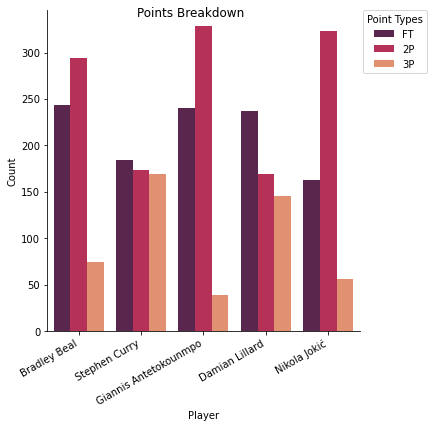

In [49]:
ax4 = sns.catplot(data=nba_top_5_points, x='Player', 
                  hue='variable', y='value', kind='bar', 
                  palette='rocket', legend_out=False)

ax4.fig.suptitle('Points Breakdown')
ax4.set_axis_labels('Player', 'Count')
plt.xticks(rotation=30, ha='right')

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title='Point Types', loc='upper left')

### 2.2 Data Error

In [50]:
nba_error = nba[['PTS', '3P', '3PA', '3P%']]

Text(0.5, 0.98, 'Scatter Matrix of NBA 3 Pointers')

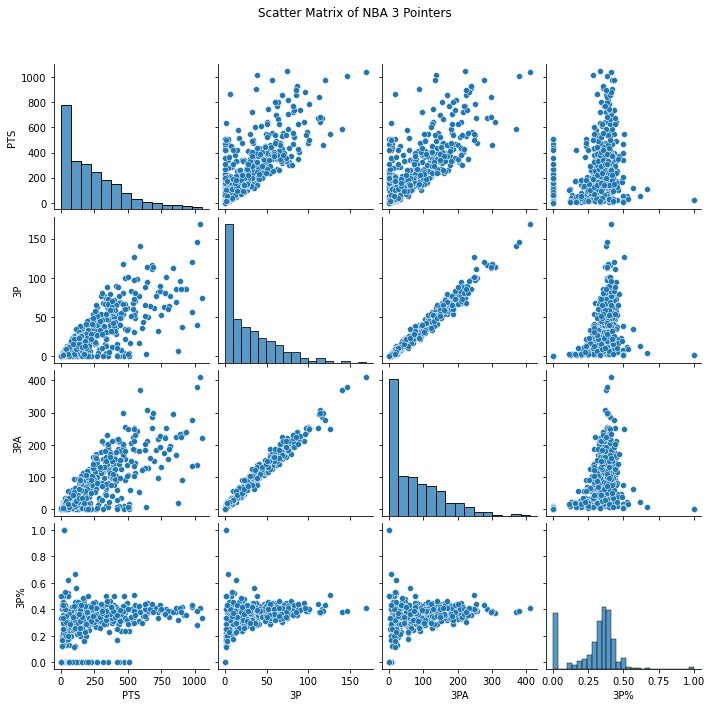

In [52]:
fig1 = sns.pairplot(nba_error, palette='rocket')
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle('Scatter Matrix of NBA 3 Pointers')

In [74]:
nba_error['3P%?'] = round(nba['3P']/nba['3PA'], 3)

Text(0.5, 1.0, 'Three Point Attempt Percentage')

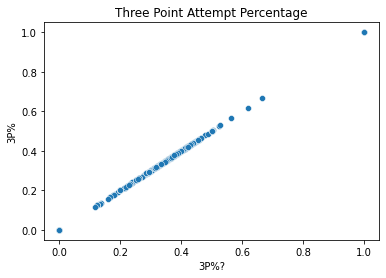

In [75]:
# Perfectly correlated indicating the error has been resolved in the Data Cleaning stage
ax6 = sns.scatterplot(data=nba_error, x='3P%?', y='3P%')
ax6.set_title('Three Point Attempt Percentage')

Text(0.5, 1.0, 'Three Point Attempt vs. Points Scored')

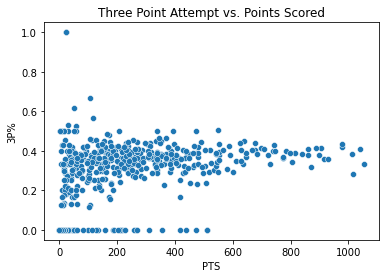

In [55]:
ax7 = sns.scatterplot(data=nba_error, x='PTS', y='3P%')
ax7.set_title('Three Point Attempt vs. Points Scored')

In [64]:
# Checking why there seem to be a high number of players with a low three pointer percentage. 
# Nothing seems awry, it's potentially related to their playing position (C)
nba[(nba['3P%'] == 0) & (nba['PTS'] > 300)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
85,84,Clint Capela,C,26,ATL,32,32,949,208,353,0.589,0,0,0.0,208,353,0.589,55,100,0.550,159,294,453,29,24,71,46,73,471
126,125,Andre Drummond,C,27,CLE,25,25,722,180,380,0.474,0,8,0.0,180,372,0.484,77,129,0.597,101,236,337,64,40,29,81,69,437
163,162,Rudy Gobert,C,28,UTA,36,36,1105,196,306,0.641,0,1,0.0,196,305,0.643,118,197,0.599,120,352,472,48,17,98,64,82,510
188,185,Montrezl Harrell,C,27,LAL,37,1,891,209,334,0.626,0,6,0.0,209,328,0.637,93,123,0.756,89,149,238,39,24,27,41,77,511
252,247,Enes Kanter,C,28,POR,35,23,919,177,298,0.594,0,0,0.0,177,298,0.594,63,84,0.750,146,269,415,40,18,26,41,94,417
381,368,Mason Plumlee,C,30,DET,34,34,953,145,239,0.607,0,6,0.0,145,233,0.622,64,95,0.674,94,217,311,130,28,29,72,120,354
511,492,Ivica Zubac,C,23,LAC,38,1,753,120,182,0.659,0,1,0.0,120,181,0.663,71,86,0.826,90,176,266,43,14,30,39,228,311


### 2.3 Further Analysis

In [117]:
nba_further = nba[['Player', 'PTS', 'Pos', 'Age', 'G', 'Tm']]

Text(0.5, 0.98, 'Scatter Matrix of 3 Pointers vs. other variables')

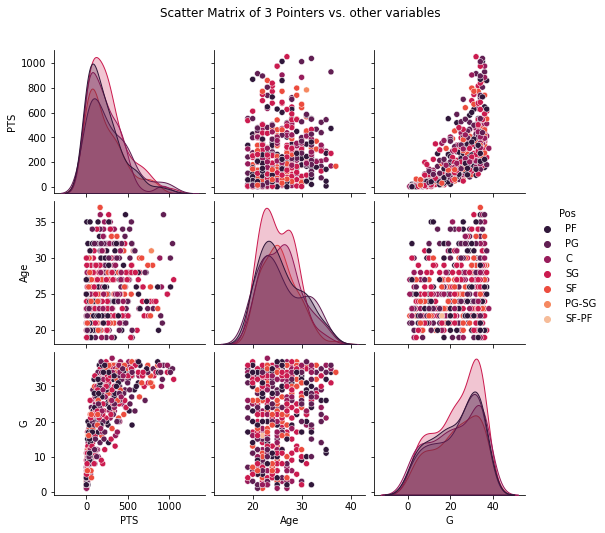

In [118]:
fig2 = sns.pairplot(nba_further, hue='Pos', palette='rocket')
fig2.fig.subplots_adjust(top=0.9)
fig2.fig.suptitle('Scatter Matrix of 3 Pointers vs. other variables')

In [90]:
nba_further_mean = nba_further.groupby('Pos').mean()
nba_further_mean = nba_further_mean.reset_index(drop=False)

Text(0, 0.5, 'Points')

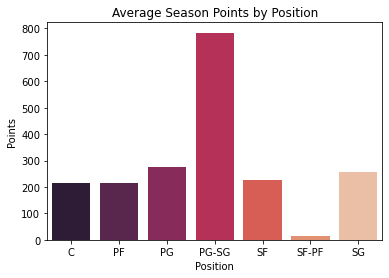

In [93]:
ax8 = sns.barplot(data=nba_further_mean, x='Pos', y='PTS', palette='rocket')

ax8.set_title('Average Season Points by Position')
ax8.set_xlabel('Position')
ax8.set_ylabel('Points')

In [122]:
nba_further_team_sum = nba_further.groupby('Tm').sum()
nba_further_team_sum = nba_further_team_sum.reset_index(drop=False).sort_values('PTS', ascending=False)

Text(0, 0.5, 'Team')

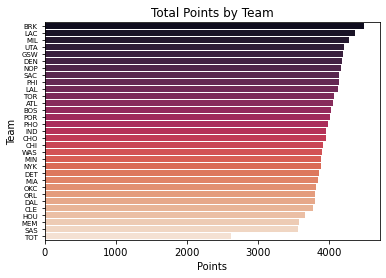

In [137]:
ax9 = sns.barplot(data=nba_further_team_sum, x='PTS', y='Tm', palette='rocket')

plt.yticks(fontsize=7)

ax9.set_title('Total Points by Team')
ax9.set_xlabel('Points')
ax9.set_ylabel('Team')

Text(0.5, 0, 'Games')

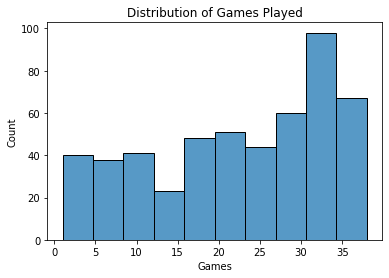

In [105]:
ax10 = sns.histplot(nba['G'], palette='rocket')

ax10.set_title('Distribution of Games Played')
ax10.set_xlabel('Games')

In [108]:
nba_further['G_bins'] = pd.cut(nba_further['G'], bins=[1,10,20,30,38], labels=['1-10', '11-20', '21-30', '31-38'])

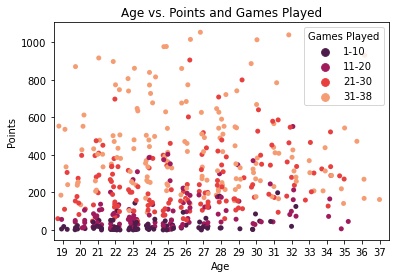

In [116]:
ax11 = sns.stripplot(data=nba_further, x='Age', y='PTS', hue='G_bins', palette='rocket', jitter=0.3)

ax11.set_title('Age vs. Points and Games Played')
ax11.set_ylabel('Points')
plt.legend(title='Games Played')